# Binary Detection 

This notebooks illustrate the use of the BinaryDetector object.

In [11]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


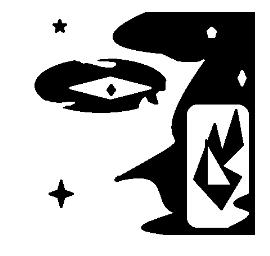

In [13]:
#Load the image
path_to_image_nested = 'images/Binary_nested.png'
#path_to_image = '../tests/images/Binary/Binary_ellipse1.png'
img = cv2.imread(path_to_image_nested, cv2.IMREAD_GRAYSCALE)
#img = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
sr.show_image(img)

In [14]:
#Define parameters and get structuring elements
connectivity = 4
area_factor = 0.05
SE_size_factor = 0.075
SE = sio.loadmat("images/SE_neighb_nested.mat")['SE_n'] 
#SE = sio.loadmat("../tests/images/Binary/SE_neighb_all_other.mat")['SE_n'] 
lam = 80
print('SE size is: %f' % SE.shape[0])

SE size is: 31.000000


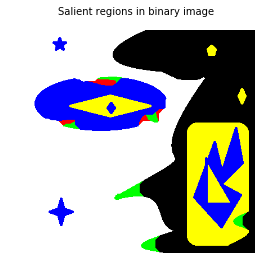

In [15]:
detector = sr.BinaryDetector(SE, lam, area_factor, connectivity)
regions = detector.detect(img)

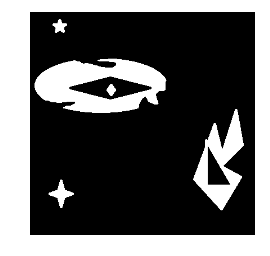

In [16]:
#Show the holes
sr.show_image(detector.get_holes())

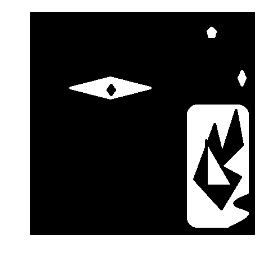

In [17]:
#Show the islands
sr.show_image(detector.get_islands())

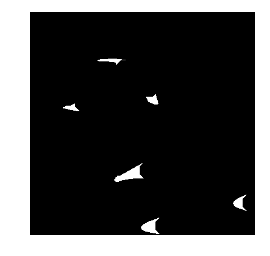

In [18]:
#Show the indentations
sr.show_image(detector.get_indentations())

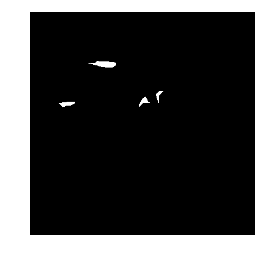

In [19]:
#Show the protrusions
sr.show_image(detector.get_protrusions())

We can also output the regions as ellipses

In [20]:
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions)